# Dimension Reduction

In this analysis, we focus ondimensionality reduction methods to reduce the feature space from 10 macroeconomic indicators
to a lower-dimensional representation while preserving essential patterns and structures.

Unsupervised Methods Used:
Principal Component Analysis (PCA): PCA is a linear transformation method that reduces the dimensionality of data by finding the directions (principal components) that capture the maximum variance.
t-Distributed Stochastic Neighbor Embedding (t-SNE): t-SNE is a non-linear dimensionality reduction method that aims to preserve the structure of high-dimensional data by minimizing the distance between similar points in a lower-dimensional space.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
# Load the dataset
file_path = Path('dataset.xlsx')
worldBank = pd.read_excel(file_path)
print(worldBank.head())
worldBank = worldBank.drop(columns=worldBank.columns[1])
worldBank.iloc[:, 1:] = worldBank.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
worldBank = worldBank.fillna(worldBank.mean())
print(f"Shape of the dataset: {worldBank.shape}")

                  Country Name Country Code  \
0             Egypt, Arab Rep.          EGY   
1                      Turkiye          TUR   
2                  Afghanistan          AFG   
3  Africa Eastern and Southern          AFE   
4   Africa Western and Central          AFW   

  2023 [YR2023] - Unemployment with advanced education, male (% of male labor force with advanced education) [SL.UEM.ADVN.MA.ZS]  \
0                                                 ..                                                                               
1                                              6.693                                                                               
2                                                 ..                                                                               
3                                                 ..                                                                               
4                                                 ..     

TypeError: can only concatenate str (not "int") to str

In [51]:
worldBank = worldBank.apply(pd.to_numeric, errors='coerce')
worldBank = worldBank.fillna(worldBank.mean())
print(f"Shape of the dataset after handling non-numeric and missing values: {worldBank.shape}")

Shape of the dataset after handling non-numeric and missing values: (271, 13)


Explained variance ratio (PCA): [0.35613413 0.21089449 0.18520646]


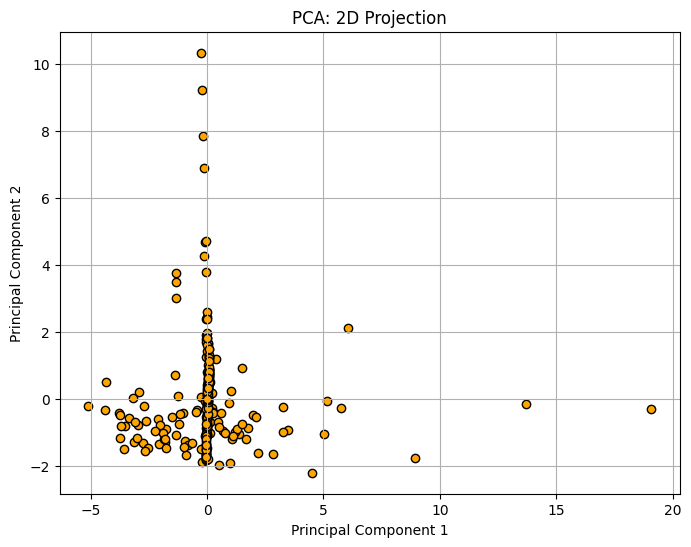

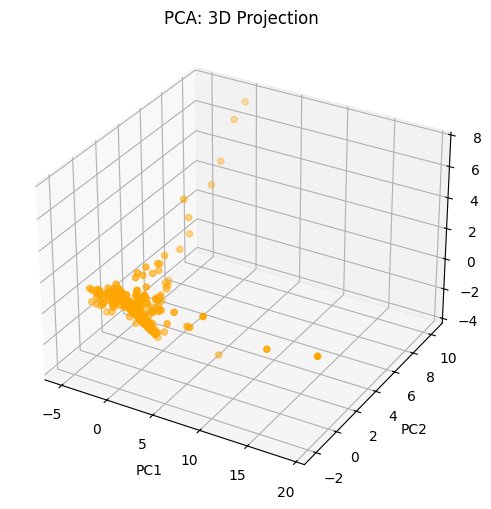

In [53]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(worldBank.iloc[:, 1:])
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)
print("Explained variance ratio (PCA):", pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='orange', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection')
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c='orange')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA: 3D Projection')
plt.show()

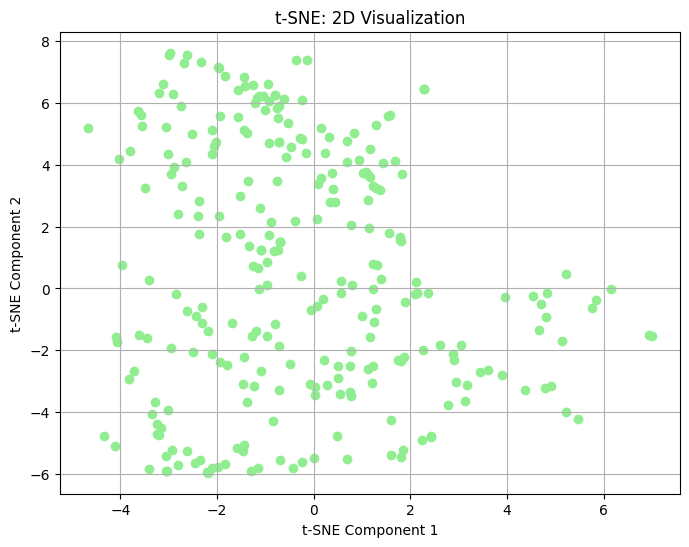

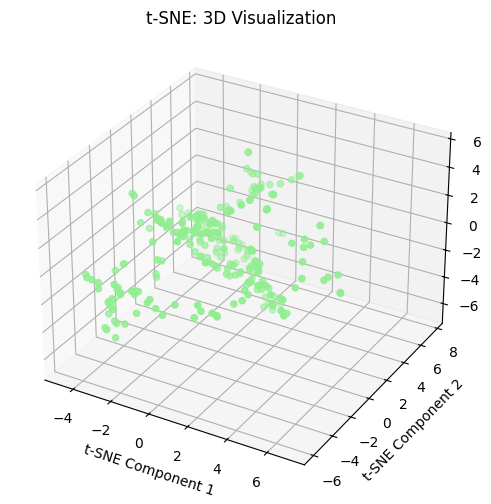

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='lightgreen')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: 2D Visualization')
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c='lightgreen')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE: 3D Visualization')
plt.show()

In [57]:
print("Explained variance ratio (PCA):", pca.explained_variance_ratio_)
print("t-SNE aims to preserve the underlying structure while reducing dimensions, but loses variance directly.")

Explained variance ratio (PCA): [0.35613413 0.21089449 0.18520646]
t-SNE aims to preserve the underlying structure while reducing dimensions, but loses variance directly.
